Importing every usefull packages and files :

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load the csv files
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test_s = pd.read_csv('gender_submission.csv')

Basic vizualisation of the different databases :

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
df.shape, df_test.shape, df_test_s.shape

((891, 12), (418, 11), (418, 2))

In [6]:
# joining of the two test databases based on the passenger id
df_test = pd.merge(df_test, df_test_s, on='PassengerId')

In [7]:
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Clearing Data :

Duplicata :

In [9]:
print('train - Number of duplicate Record:', df.duplicated().sum())
print('test - Number of duplicate Record:', df_test.duplicated().sum())

train - Number of duplicate Record: 0
test - Number of duplicate Record: 0


Null values :

In [10]:
#Find the number of null per each columns
print('Columns in train with null values:')
print(df.isnull().sum())

print('\n\nColumns in test with null values:')
print(df_test.isnull().sum())

Columns in train with null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Columns in test with null values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [11]:
#dropping cabin column
df = df.drop(columns='Cabin', axis=1)
df_test = df_test.drop(columns='Cabin', axis=1)

# replacing null age values with the median
df['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

# replacing null embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# removing the last null row from test dataset
df_test = df_test.dropna()

More advanced data vizualisation :

<Axes: xlabel='Sex', ylabel='count'>

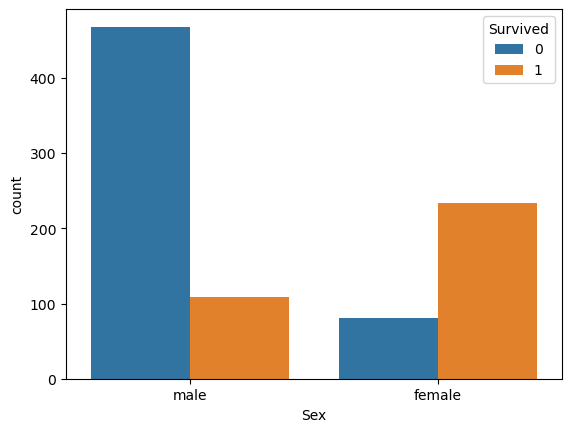

In [12]:
# relation between sex and death
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

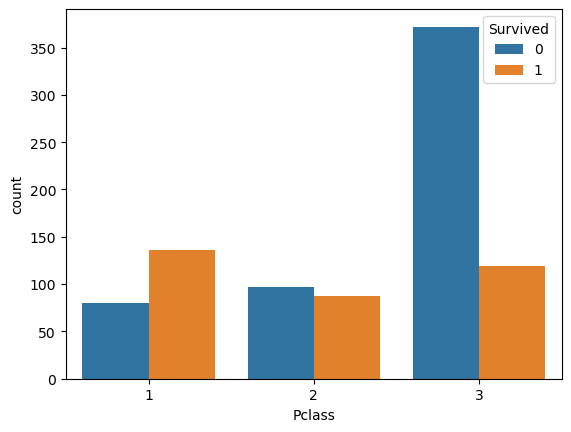

In [13]:
# relation between class and death
sns.countplot(x='Pclass', hue='Survived', data=df)

In [14]:
# replacing string values with numerical values
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [15]:
# spliting target and features
X_train = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
X_test = df_test.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y_train = df['Survived']
Y_test = df_test['Survived']
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(891, 7) (417, 7)
(891,) (417,)


In [16]:
# creating a dictionnary grid with a few different hyper-parameters
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500]
}
# using gridsearchcv to choose the best parameters
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
logi = LogisticRegression()
# fit the two logistic regression models according to the given training data
grid.fit(X_train, Y_train)
logi.fit(X_train, Y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, p

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fi

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=Fal

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, so

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_in

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_ite

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, p

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=50, p

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=Tr

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, pen

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=Tr

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.1s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=Tr

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=Fa

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=Fals

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=Fals

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=F

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, pena

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=saga

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solve

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penal

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, pen

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalt

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penal

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, pena

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, pen

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg;

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, pe

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=50, pe

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalt

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_ite

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_it

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=Fal

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=newton

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True,

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=Tr

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=T

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=Tru

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=F

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=Fals

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_inte

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, m

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=True, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_i

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_int

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=True, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=50, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, ma

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, f

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\s

[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1

c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
840 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\martj\miniconda3\envs\py38\lib\site-packages\sklearn\base.py", line 1151, in w

LogisticRegression()

In [17]:
# see what the best logistic regression hyper-parameters are
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=0.1, max_iter=50)
{'C': 0.1, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8002196974452327


In [18]:
# use our models on the test database and compare them
predictions = grid.predict(X_test)
print("accuracy score with model's hyper-parameter improvement : ", accuracy_score(predictions, Y_test))
predictions_simple = logi.predict(X_test)
print("accuracy score without model's hyper-parameter improvement : ", accuracy_score(predictions_simple, Y_test))

accuracy score with model's hyper-parameter improvement :  0.9640287769784173
accuracy score without model's hyper-parameter improvement :  0.9424460431654677


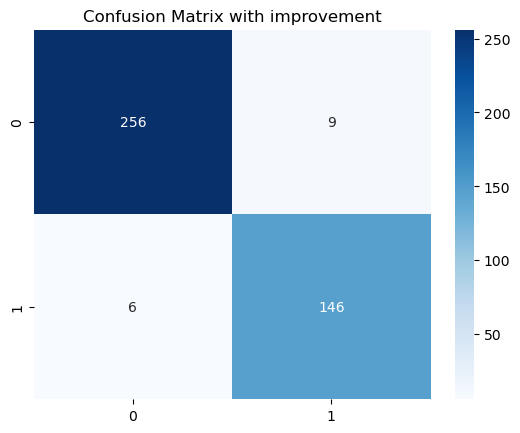

In [19]:
# showing the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with improvement')
plt.show()

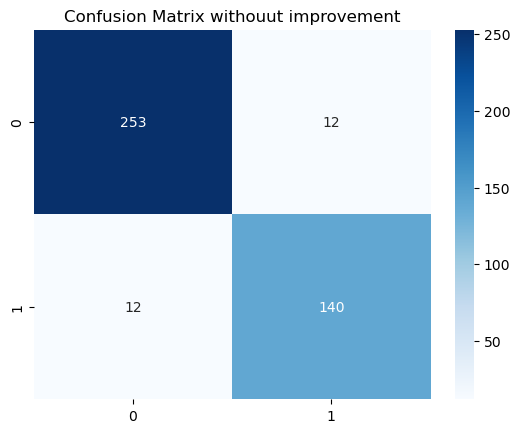

In [20]:
# showing the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_simple)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix withouut improvement')
plt.show()

In [21]:
# showing the classification reports
print("Classification report with improvement : \n\n", classification_report(Y_test, predictions))
print("Classification report without improvement : \n\n", classification_report(Y_test, predictions_simple))

Classification report with improvement : 

               precision    recall  f1-score   support

           0       0.98      0.97      0.97       265
           1       0.94      0.96      0.95       152

    accuracy                           0.96       417
   macro avg       0.96      0.96      0.96       417
weighted avg       0.96      0.96      0.96       417

Classification report without improvement : 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.92      0.92      0.92       152

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417



In [22]:
# Save the best model to a file
joblib.dump(grid, 'best_model_svm_titanic.pkl')

['best_model_svm_titanic.pkl']